## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [26]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import numpy as np
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x167505076d8>,
 'caps': [<matplotlib.lines.Line2D at 0x167506d1c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x167504e4630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16750757710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x167505077f0>,
  <matplotlib.lines.Line2D at 0x1675037d0f0>]}

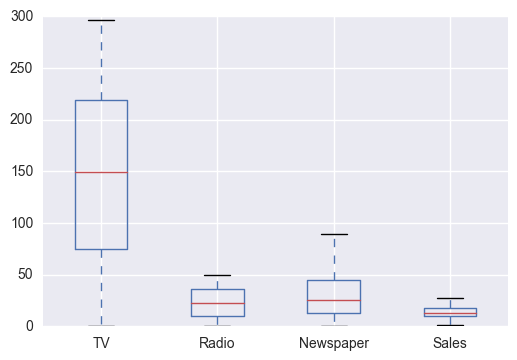

In [27]:
df.boxplot()


### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

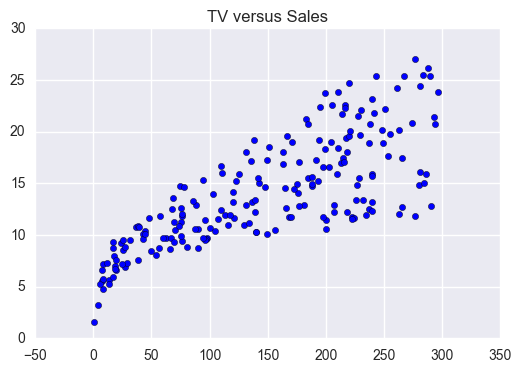

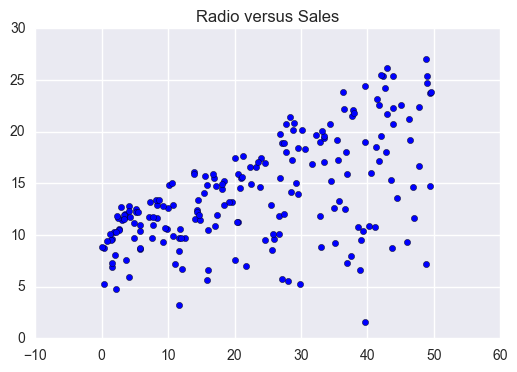

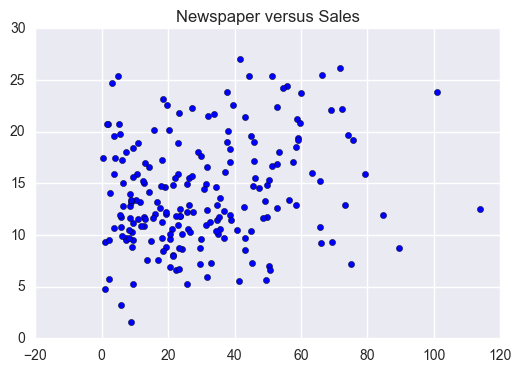

In [28]:
plt.scatter(df.values[:, 0],df.values[:, 3])
plt.title("TV versus Sales")
plt.show()
plt.scatter(df.values[:, 1],df.values[:, 3])
plt.title("Radio versus Sales")
plt.show()

plt.scatter(df.values[:, 2],df.values[:, 3])
plt.title("Newspaper versus Sales")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000167505A8978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001674E511828>]], dtype=object)

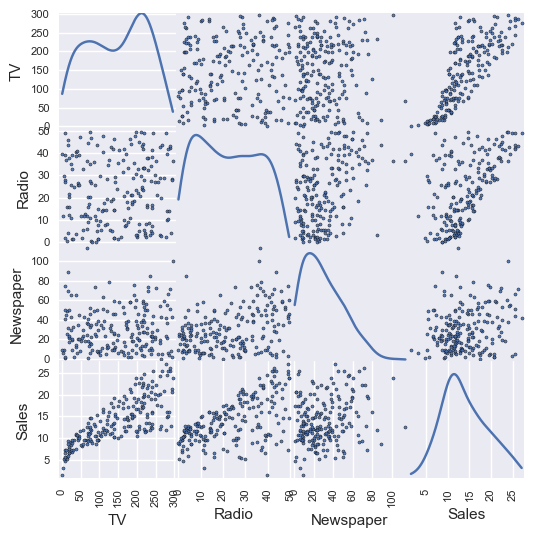

In [29]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.9, figsize=(6, 6), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [30]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [31]:

y = df.values[:, 3]

b) Set X to be just the features described above in df

In [32]:
X = df.values[:, [0,1,2]]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [33]:
from sklearn import preprocessing

size = df.shape[0]
#To normalize data, we can do normalized_X = preprocessing.normalize(X)
X_train = X[0:int(size*0.8)]

#To normalize data, we can do normalized_X = preprocessing.normalize(X)
X_test = X[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

print(X_test.shape)


(40, 3)


d) Train model on training data, and make predictions on testing data

In [34]:
 # Create linear regression object
regr = LinearRegression()

# # Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [35]:
print('Variance score: %.2f' % regr.score(X_test, y_test))
print("This score is relatively high because it indicates the linear regression model match the data points well")
# The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum()
# and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum().

Variance score: 0.90
This score is relatively high because it indicates the linear regression model match the data points well


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

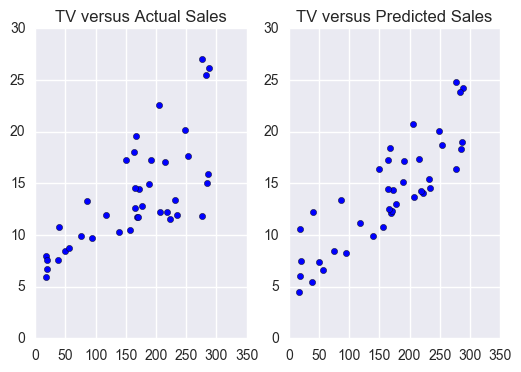

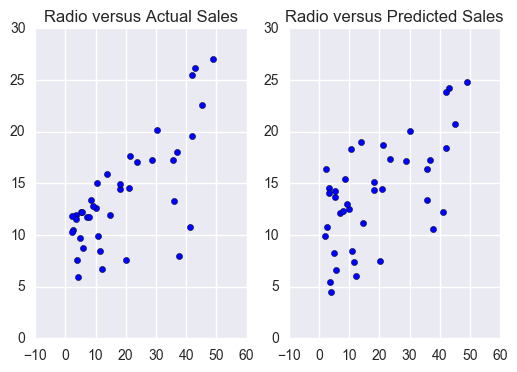

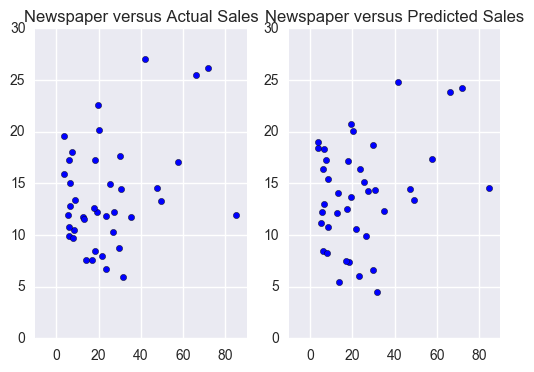

This looks like a good model because the predicted graph looks very similar to the actual graphTheir data points distributions are very similar to one another.


In [36]:
y_predict = regr.predict(X_test)

fig = plt.figure()
fig.add_subplot(121)
plt.scatter(X_test[:, 0],y_test)
plt.title("TV versus Actual Sales")
fig.add_subplot(122)
plt.scatter(X_test[:, 0],y_predict)
plt.title("TV versus Predicted Sales")
plt.show()

fig = plt.figure()
fig.add_subplot(121)
plt.scatter(X_test[:, 1],y_test)
plt.title("Radio versus Actual Sales")
fig.add_subplot(122)
plt.scatter(X_test[:, 1],y_predict)
plt.title("Radio versus Predicted Sales")
plt.show()

fig = plt.figure()
fig.add_subplot(121)
plt.scatter(X_test[:, 2],y_test)
plt.title("Newspaper versus Actual Sales")
fig.add_subplot(122)
plt.scatter(X_test[:, 2],y_predict)
plt.title("Newspaper versus Predicted Sales")
plt.show()

print("This looks like a good model because the predicted graph looks very similar to the actual graph" +
      "Their data points distributions are very similar to one another.")

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [37]:


print("QS g1: The measure of importance of features can be based on the magnitude of coefficient.")
print("QS g2: We should check the magnitude of data for each feature. If their magnitudes greatly differ from one another,"+
     "then it's better to normalize the data first.")


QS g1: The measure of importance of features can be based on the magnitude of coefficient.
QS g2: We should check the magnitude of data for each feature. If their magnitudes greatly differ from one another,then it's better to normalize the data first.


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [38]:
# The coefficients
print('Coefficients: \n', regr.coef_)

max_coe = max(regr.coef_).tolist()
max_index = regr.coef_.tolist().index(max_coe)
print("most influential factor is: {}".format(list(df)[max_index]))
print( "Conclusion from g): In this case, TV has the largest magnitude. Hence it's the most important feature.")
print("We should have normalized the training data of predictors")

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
most influential factor is: Radio
Conclusion from g): In this case, TV has the largest magnitude. Hence it's the most important feature.
We should have normalized the training data of predictors


## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

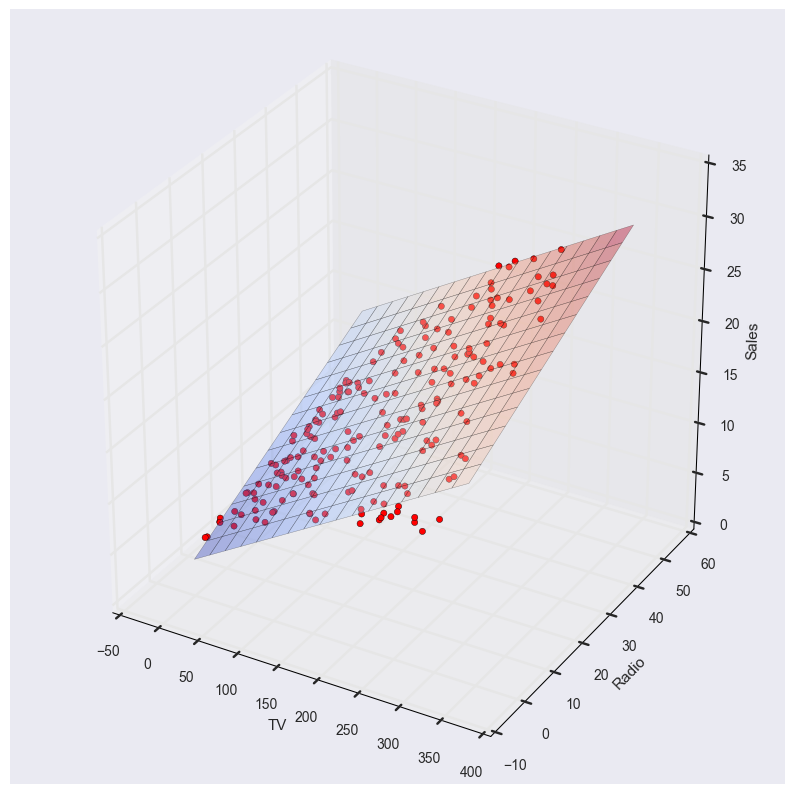

In [39]:


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)#select the model
fit = model.fit()#start fitting

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)#generate a numpy array                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)

ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='blue',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='red',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

#tv and radio

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.030268742935560547, m = 1.4788564491203373, error = 112.64994839451705


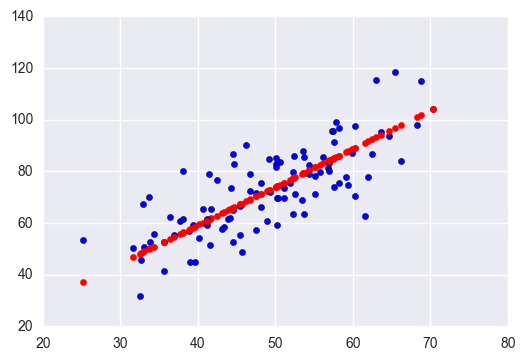

In [51]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.00002
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(
        initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(
            num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

In [47]:
print("Explanation on learning rate: if the learning rate is too high, then each step of gradient descent"+
      "will be too wide and may jump from one side to another with respect to the minimum point." +
     "This means the algorithm may not reach the minimum point. If the learning rate is too small, then the convergence"+
     "will takes longer because each step of gradient descent is smaller")

Explanation on learning rate: if the learning rate is too high, then each step of gradient descentwill be too wide and may jump from one side to another with respect to the minimum point.This means the algorithm may not reach the minimum point. If the learning rate is too small, then the convergencewill takes longer because each step of gradient descent is smaller


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


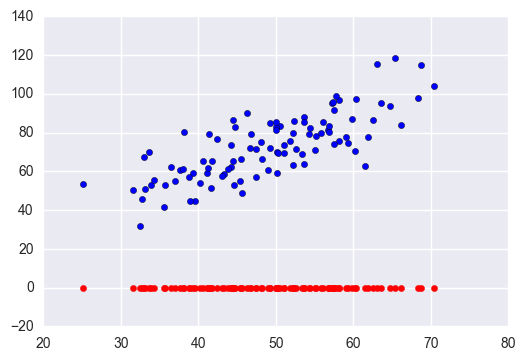

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0029094020221474594, m = 0.14741405947182104, error = 4532.312201396711


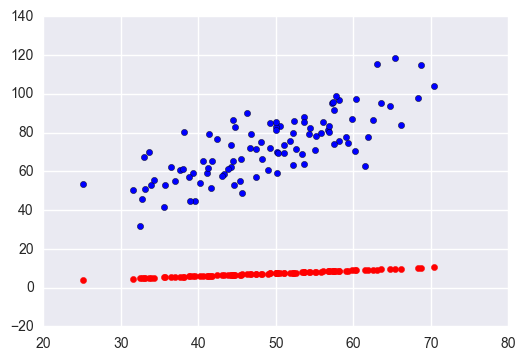

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.00553000175381979, m = 0.28013431332897426, error = 3695.1470468221455


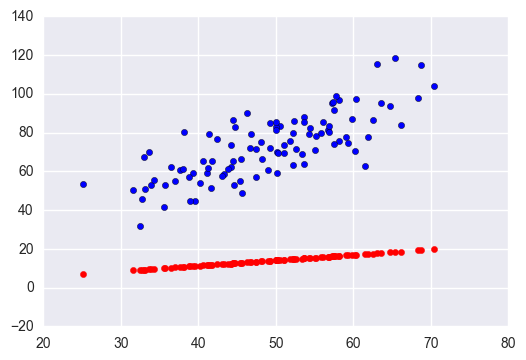

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.00789058612121472, m = 0.39962539512294676, error = 3016.55636164746


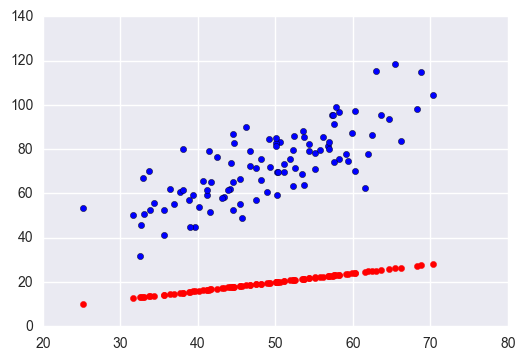

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.010017072657871738, m = 0.5072059482175, error = 2466.503226126207


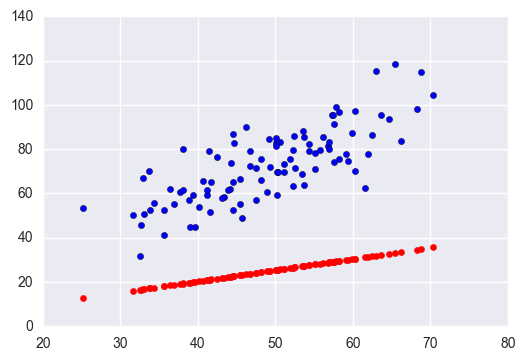

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.011932795516946228, m = 0.6040631776435622, error = 2020.6402653123632


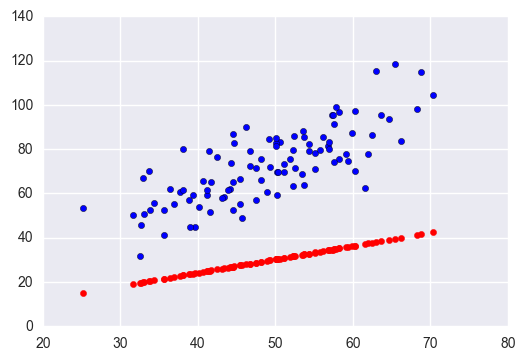

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.013658762974655885, m = 0.6912659514697834, error = 1659.2319446782212


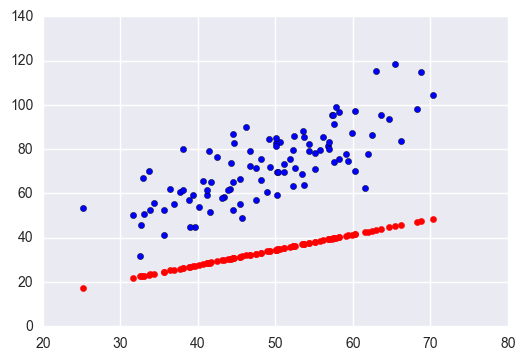

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.015213889266572063, m = 0.7697765962685891, error = 1366.2810027548135


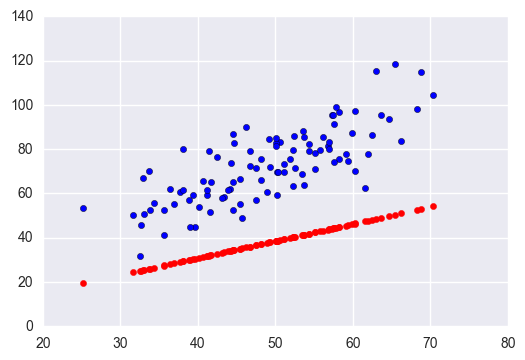

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.01661520331517948, m = 0.8404615168462952, error = 1128.8203534899642


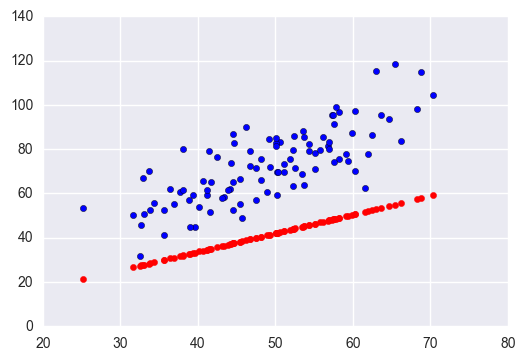

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.01787803665211189, m = 0.904100757431043, error = 936.3391153174337


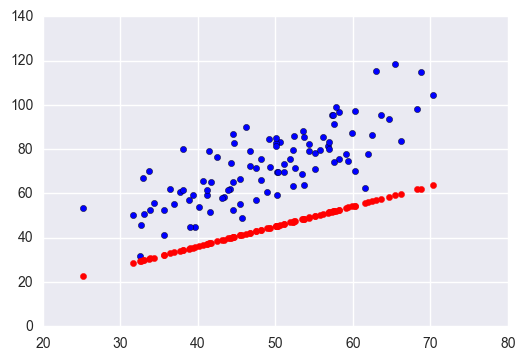

In [52]:

for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

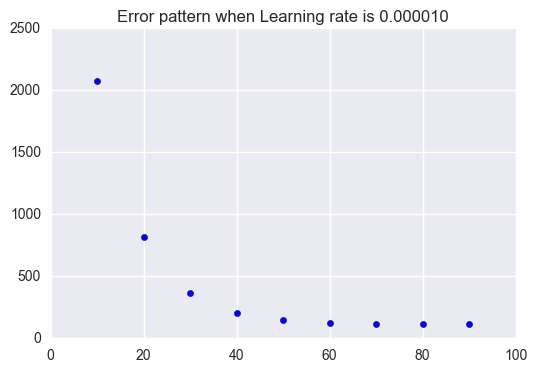

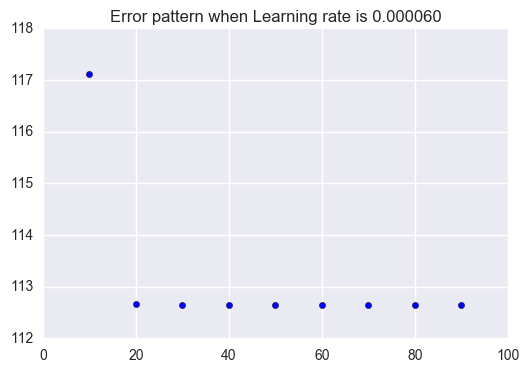

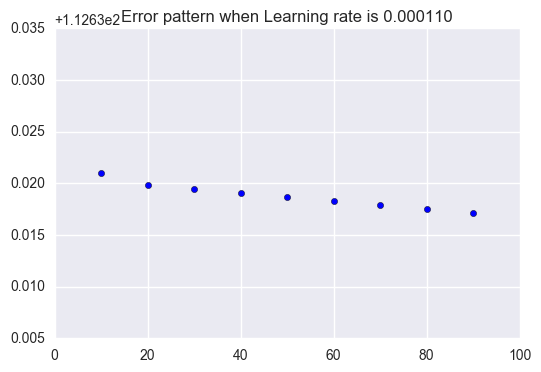

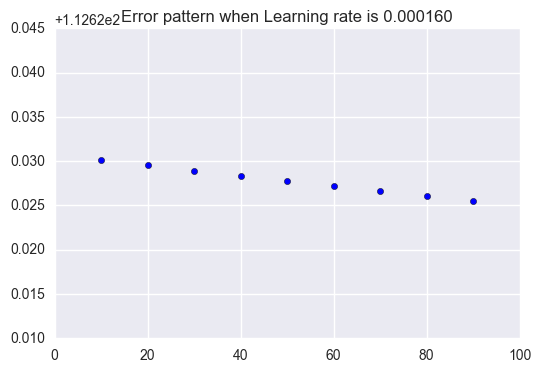

In [79]:
import numpy as np
#Include learning rate as a parameter for run:

def run(num_iterations, rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
  
    return compute_error_for_line_given_points(b, m, points)


errors = [9]*9
fig = plt.figure()
for rate in np.arange(0.00001, 0.0002, 0.00005):
    for iterations in range(10,100,10):
        errors[iterations//11] = run(iterations, rate)
    plt.subplots(1,1,sharey='row')    
    plt.scatter(range(10,100,10), errors)
    
    plt.title("Error pattern when Learning rate is {:06.6f}".format(rate))
    plt.show()
        
        